In [1]:
import numpy as np
import pandas as pd
from evaldata import EvalData
import matplotlib.pyplot as plt

# Load Data

In [2]:
BASE = 'AnomalyDetection_NabData_Txt\\'

# measure = 'Accuracy'
# measure = 'Precision'
# measure = 'Recall'
# measure = 'f-measure'
# measure = 'cohen_kappa_score'
measure = 'auc'

title = measure
title = ''
if measure == 'f-measure':
    SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
    title = 'F1 Score'.translate(SUB)
elif measure == 'cohen_kappa_score':
    title = 'Cohen Kappa Score'
elif measure == 'auc':
    title = 'Area Under Curve'
else:
    title = measure

ed = EvalData()
data = ed.get_data(BASE, measure)
data.shape

Eval Data Object Created


(9, 46)

# Visualise

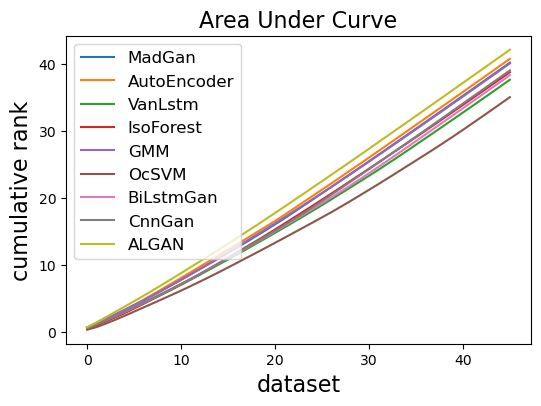

In [3]:
def cumuRanking(data):
    cdata = []
    for row in data:
        crow = []
        c = 0
        row = np.sort(row)
        for col in row:
            c += col
            crow.append(c)
        cdata.append(crow)
    cdata = np.array(cdata)
    f,ax = plt.subplots(figsize=(6,4))
    for crow in cdata:
        ax.plot(range(cdata.shape[1]), crow)
    plt.xlabel('dataset', fontsize=16)
    plt.ylabel('cumulative rank', fontsize=16)
    plt.legend(['MadGan', 'AutoEncoder', 'VanLstm', 'IsoForest', 'GMM', 'OcSVM', 'BiLstmGan', 'CnnGan', 'ALGAN'], fontsize=12)
    plt.title(title, fontsize=16)
    #plt.legend(['GAN', 'AutoEnco', 'LSTM', 'IsoForest', 'GMM', 'OCS'])
    
cumuRanking(data)